# 1 Introduction

In this practical, we will create a feed-forward neural network as well as a convolutional neural network to analyze the famous MNIST dataset.

Let's first set up the libraries

In [1]:
# Install necessary libraries
!pip install tensorflow matplotlib numpy

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt

# 2 Take-home exercises: deep feed-forward neural network

In this section, we will develop a deep feed-forward neural network for MNIST.

## 2.1 Data preparation

**1. Load the built-in MNIST dataset by running the following code. Then, describe the structure and contents of the `mnist` object.**

Plotting is very important when working with image data. We have defined a convenient plotting function for you.

**2. Use the `plot_img()` function below to plot the first training image. The `img` parameter has to be a matrix with dimensions `(28, 28)`.** NB: indexing in 3-dimensional arrays works the same as indexing in matrices, but you need an extra comma `x[,,]`.

```{r}
plot_img <- function(img, col = gray.colors(255, start = 1, end = 0), ...) {
  image(t(img), asp = 1, ylim = c(1.1, -0.1), col = col, bty = "n", axes = FALSE, ...)
}
```

It is usually a good idea to normalize your features to have a manageable, standard range before entering them in neural networks.

**3. As a preprocessing step, ensure the brightness values of the images in the training and test set are in the range (0, 1)**


In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range (0, 1)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


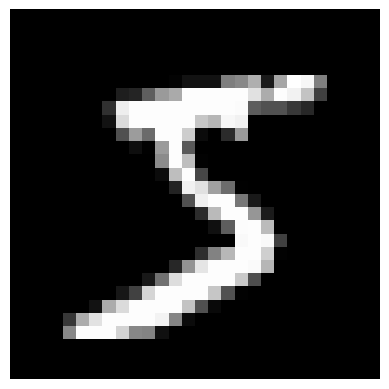

In [3]:
# Function to plot an image
def plot_img(img):
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

plot_img(x_train[0])  # Plot the first training image


## 2.2 Multinomial logistic regression

The simplest model is a multinomial logistic regression model, where we have no hidden layers and 10 outputs (0-1). That model is shown below.

**4. Display a summary of the multinomial model using the `summary()` function. Describe why this model has 7850 parameters.**

```{r}
multinom  <-
  keras_model_sequential(input_shape = c(28, 28)) %>% # initialize a sequential model
  layer_flatten() %>% # flatten 28*28 matrix into single vector
  layer_dense(10, activation = "softmax") # softmax outcome == logistic regression for each of 10 outputs

multinom$compile(
  loss = "sparse_categorical_crossentropy", # loss function for multinomial outcome
  optimizer = "adam", # we use this optimizer because it works well
  metrics = list("accuracy") # we want to know training accuracy in the end
)
```

**5. Train the model for 5 epochs using the code below. What accuracy do we obtain in the validation set?** (NB: the multinom object is changed “in-place”, which means you don’t have to assign it to another variable)

```{r}
multinom %>% fit(x = mnist$train$x, y = mnist$train$y, epochs = 5, validation_split = 0.2, verbose = 1)
```

**6. Train the model for another 5 epochs. What accuracy do we obtain in the validation set?**


In [4]:
# Create a multinomial logistic regression model
multinom = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation="softmax")
])

# Compile the model
multinom.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train the model
history_multinom = multinom.fit(
    x_train, y_train, epochs=5, validation_split=0.2, verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8044 - loss: 0.7679 - val_accuracy: 0.9112 - val_loss: 0.3198
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9104 - loss: 0.3230 - val_accuracy: 0.9227 - val_loss: 0.2848
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9188 - loss: 0.2923 - val_accuracy: 0.9220 - val_loss: 0.2768
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9213 - loss: 0.2817 - val_accuracy: 0.9247 - val_loss: 0.2694
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9246 - loss: 0.2722 - val_accuracy: 0.9258 - val_loss: 0.2708


We obtain an accuracy of 0.926 for the validation set.

In [5]:
# Train for another 5 epochs
history_multinom = multinom.fit(
    x_train, y_train, epochs=5, validation_split=0.2, verbose=1
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9244 - loss: 0.2654 - val_accuracy: 0.9273 - val_loss: 0.2635
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9272 - loss: 0.2631 - val_accuracy: 0.9291 - val_loss: 0.2633
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9263 - loss: 0.2571 - val_accuracy: 0.9285 - val_loss: 0.2638
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9302 - loss: 0.2556 - val_accuracy: 0.9298 - val_loss: 0.2596
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9299 - loss: 0.2551 - val_accuracy: 0.9297 - val_loss: 0.2620


After training for 5 more Epoch's, the accuracy for the validation set rises to 0.930, so an improvement of 0.004 over the initial model.

## 2.3 Deep feed-forward neural networks.

**7. Create and compile a feed-forward neural network with the following properties. Ensure that the model has 50890 parameters.**

-   sequential model

-   flatten layer

-   dense layer with 64 hidden units and “relu” activation function

-   dense output layer with 10 units and softmax activation function

You may reuse code from the multinomial model

**7. Train the model for 10 epochs. What do you see in terms of validation accuracy, also compared to the multinomial model?**

**8. Create predictions for the test data using the two trained models (using the function below). Create a confusion matrix and compute test accuracy for these two models. Write down any observations you have.**

```{r}
class_predict <- function(model, x_train) predict(model, x = x_train) %>% apply(1, which.max) - 1
```

**9. OPTIONAL: if you have time, create and estimate (10 epochs) a deep feed-forward model with the following properties. Compare this model to the previous models on the test data.**

-   sequential model

-   flatten layer

-   dense layer with 128 hidden units and “relu” activation function

-   dense layer with 64 hidden units and “relu” activation function

-   dense output layer with 10 units and softmax activation function

In [6]:
# Define a feed-forward neural network
dnn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

# Compile the model
dnn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train the model
history_dnn = dnn.fit(
    x_train, y_train, epochs=10, validation_split=0.2, verbose=1
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8504 - loss: 0.5369 - val_accuracy: 0.9467 - val_loss: 0.1947
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9487 - loss: 0.1806 - val_accuracy: 0.9569 - val_loss: 0.1477
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9652 - loss: 0.1221 - val_accuracy: 0.9645 - val_loss: 0.1216
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9708 - loss: 0.0997 - val_accuracy: 0.9651 - val_loss: 0.1177
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9752 - loss: 0.0828 - val_accuracy: 0.9703 - val_loss: 0.1051
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9809 - loss: 0.0641 - val_accuracy: 0.9716 - val_loss: 0.0980
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9852 - loss: 0.0530 - val_accuracy: 0.9662 - val_loss: 0.1162
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0466 - 

In [7]:
# Function to predict classes
def class_predict(model, x_data):
    return np.argmax(model.predict(x_data), axis=1)

# Generate predictions and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_multinom = class_predict(multinom, x_test)
y_pred_dnn = class_predict(dnn, x_test)

confusion_multinom = confusion_matrix(y_test, y_pred_multinom)
confusion_dnn = confusion_matrix(y_test, y_pred_dnn)

print("Multinomial Accuracy:", accuracy_score(y_test, y_pred_multinom))
print("DNN Accuracy:", accuracy_score(y_test, y_pred_dnn))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Multinomial Accuracy: 0.9252
DNN Accuracy: 0.9718


The multinomial accuracy is 0.925, while the DNN accuracy is 0.972. Thus, the accuracy of the deep-forward neural network is superior to that of the multinomial logistic regression.

# 3 Lab exercises: convolutional neural network

Convolution layers in Keras need a specific form of data input. For each example, they need a `(width, height, channels)` array (tensor). For a colour image with 28\*28 dimension, that shape is usually `(28, 28, 3)`, where the channels indicate red, green, and blue. MNIST has no colour info, but we still need the channel dimension to enter the data into a convolution layer with shape `(28, 28, 1)`. The training dataset `x_train` should thus have shape `(60000, 28, 28, 1)`.

**10. add a “channel” dimension to the training and test data using the following code. Plot an image using the first channel of the 314th training example (this is a 9).**

```{r}
# add channel dimension to input (required for convolution layers)
dim(mnist$train$x) <- c(dim(mnist$train$x), 1)
dim(mnist$test$x)  <- c(dim(mnist$test$x), 1)
```

**11. Create and compile a convolutional neural network using the following code. Describe the different layers in your own words.**

```{r}
cnn <-
  keras_model_sequential(input_shape = c(28, 28, 1)) %>%
  layer_conv_2d(filters = 6, kernel_size = c(5, 5)) %>%
  layer_max_pooling_2d(pool_size = c(4, 4)) %>%
  layer_flatten() %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(10, activation = "softmax")

cnn %>%
  compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = c("accuracy")
  )
```

**12. Fit this model on the training data (10 epochs) and compare it to the previous models.**

**13. Create another CNN which has better validation performance within 10 epochs. Compare your validation accuracy to that of your peers.**

Here are some things you could do:

-   Reduce the convolution filter size & the pooling size and add a second convolutional & pooling layer with double the number of filters

-   Add a dropout layer after the flatten layer

-   Look up on the internet what works well and implement it!

In [8]:
# Reshape data to include channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Verify the shape
print(x_train.shape, x_test.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [9]:
# Define a CNN
cnn = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(4, 4)),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])

# Compile the model
cnn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train the model
history_cnn = cnn.fit(
    x_train, y_train, epochs=10, validation_split=0.2, verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7677 - loss: 0.7597 - val_accuracy: 0.9533 - val_loss: 0.1557
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9547 - loss: 0.1477 - val_accuracy: 0.9647 - val_loss: 0.1180
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9686 - loss: 0.1022 - val_accuracy: 0.9711 - val_loss: 0.0908
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9746 - loss: 0.0829 - val_accuracy: 0.9764 - val_loss: 0.0777
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9773 - loss: 0.0716 - val_accuracy: 0.9800 - val_loss: 0.0699
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9783 - loss: 0.0699 - val_accuracy: 0.9796 - val_loss: 0.0671
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9813 - loss: 0.0607 - val_accuracy: 0.9808 - val_loss: 0.0676
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9846 -

After 10 Epoch's the accuracy is 0.985 and the validation accuracy is 0.983, both of which are very high.

In [10]:
# Define a more complex CNN
cnn_custom = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

# Compile the model
cnn_custom.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train the model
history_cnn_custom = cnn_custom.fit(
    x_train, y_train, epochs=10, validation_split=0.2, verbose=1
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8266 - loss: 0.5478 - val_accuracy: 0.9783 - val_loss: 0.0713
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.9638 - loss: 0.1171 - val_accuracy: 0.9833 - val_loss: 0.0569
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9729 - loss: 0.0876 - val_accuracy: 0.9856 - val_loss: 0.0476
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9765 - loss: 0.0727 - val_accuracy: 0.9878 - val_loss: 0.0413
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9800 - loss: 0.0635 - val_accuracy: 0.9888 - val_loss: 0.0367
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9829 - loss: 0.0562 - val_accuracy: 0.9891 - val_loss: 0.0374
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9824 - loss: 0.0539 - val_accuracy: 0.9912 - val_loss: 0.0336
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9858 -

The accuracy of this improved CNN is 0.987, whereas the acccuracy on the validation set is even greater at 0.991.

Let's now evaluate the models

In [11]:
# Evaluate validation accuracy
val_accuracy_cnn = history_cnn.history['val_accuracy'][-1]
val_accuracy_cnn_custom = history_cnn_custom.history['val_accuracy'][-1]

print("Validation Accuracy CNN:", val_accuracy_cnn)
print("Validation Accuracy Custom CNN:", val_accuracy_cnn_custom)


Validation Accuracy CNN: 0.9825833439826965
Validation Accuracy Custom CNN: 0.9909166693687439


Unsurprisingly, the improved CNN model has an improved validation accuracy with a difference of 0.008 to an impressive 0.991.